In [1]:
import numpy as np
import matplotlib.pyplot as plt

Her er et utkast til en adaptiv Runge-Kutta-metode.
    - Renskriv koden.
    - Gjør et plott av energien vs tid.
    - Prøv metoden på three-body-problem fra 'Himmelsk mekanikk'.
    - Forsøk å finn den periodiske løsningen fra øvingen.
    - Implementer en funksjon som gir deg en kontinuerlig numerisk løsning. F.eks. der y-verdier mellom tidsnodene blir gitt av en lineær interpolasjon.
    - Lag en animasjon.
    

In [2]:
%matplotlib notebook

In [3]:
def embedded_euler_heun(y0, t0, T, f, tau0, taumax, N_max, TOL):
    d = np.size(y0)
    y = np.zeros((d,N_max+1))
    y[:,0] = y0
    t = np.zeros(N_max+1)
    t[0] = t0
    tau = np.zeros(N_max+1)
    tau[0] = tau0
    k = 0
    while t[k] < T:
        k1 = f(t[k], y[:,k])
        k2 = f(t[k]+tau[k], y[:,k] + tau[k]*k1)
        y_euler = y[:,k] + tau[k]*k1 
        y_heun = y[:,k] + 0.5*tau[k]*(k1+k2)
        le = 0.5*tau[k]*(k2-k1)
        le_norm = np.linalg.norm(le)
        tau_ny = min(taumax, 0.9*(TOL/le_norm)**(1/3)*tau[k])
        if le_norm < TOL:
            t[k+1] = t[k] + tau[k]
            y[:,k+1] = y_heun
            tau[k+1] = min(tau_ny, T-t[k+1])
            k = k + 1
        else:
            tau[k] = tau_ny
                
    return (t,y,tau)

In [4]:
def f(t,y):
    d = np.size(y)
    x = y[:int(d/2)]
    v = y[int(d/2):]
    f2 = -(np.linalg.norm(x))**(-3)*x
    return np.hstack((v,f2))

<IPython.core.display.Javascript object>


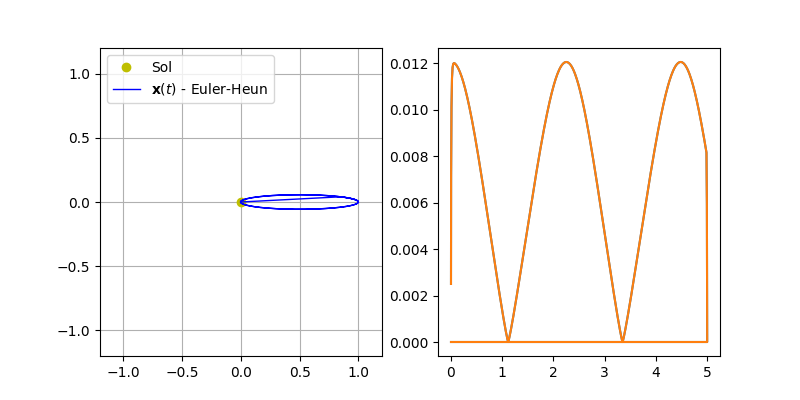

In [5]:
tau0 = 1/400
taumax = 0.2
T = 5
N_max = 10000
TOL = 1/10000
y0 = np.array([1,0,0,0.08])

t,y,tau= embedded_euler_heun(y0,0,T,f,tau0,taumax,N_max,TOL)
x1 = y[0,:]
x2 = y[1,:]


fig, axes = plt.subplots(1,2,figsize=(8,4))


axes[0].plot(0,0,'yo')
axes[0].plot(x1,x2,'b',lw=1)
axes[0].set_xlim(-1.2,1.2)
axes[0].set_ylim(-1.2,1.2)
axes[0].grid()
axes[0].legend(['Sol', '$\mathbf{x}(t)$ - Euler-Heun'], loc="upper left")



In [7]:
plt.plot(t,tau)